# Agentic RAG: Enhancing Information Retrieval with Adaptive Agents




Agentic RAG (Retrieval-Augmented Generation) represents a significant evolution from traditional RAG systems by integrating adaptive agents that facilitate real-time strategy adjustments in information retrieval. This approach not only accurately interprets user intent to deliver relevant and trustworthy responses but also features a modular design that allows for easy integration of new data sources and functionalities. By enhancing parallel processing capabilities, Agentic RAG improves performance on complex tasks by enabling agents to run concurrently.



## Key Features of Agentic RAG



- **Adaptive Agents**: Utilizes intelligent agents capable of real-time planning, execution, and optimization of query processes, adapting to evolving information landscapes.

- **User Intent Interpretation**: Accurately understands user queries to provide relevant and trustworthy information.

- **Modular Design**: Facilitates the integration of new data sources and features, enhancing flexibility and scalability.

- **Parallel Processing**: Runs multiple agents concurrently, improving performance on complex tasks and large datasets.



## How Agentic RAG Works



1. **User Query Initiation**:
   - A user submits a query to the system.

2. **Dynamic Planning**:
   - The system analyzes the query context and develops an adaptive strategy for information retrieval.

3. **Collaborative Agent Network**:
   - Specialized agents are activated:
     - **Document Retrieval Agent**: Gathers relevant documents.
     - **Summarization Agent**: Condenses information from retrieved documents.
     - **Response Generation Agent**: Crafts a coherent response based on the summarized data.

4. **Intelligent Quality Control**:
   - Agents evaluate the reliability of the gathered information.
   - Unreliable or extraneous data is filtered out to ensure accuracy.

5. **External Tool Integration**:
   - Agents utilize external tools and resources (e.g., databases, APIs) to enhance data gathering.

6. **Iterative Feedback Loop**:
   - The system may refine responses based on user feedback or further queries, improving accuracy and relevance over time.

7. **Final Response Delivery**:
   - A well-structured response is generated and presented to the user.



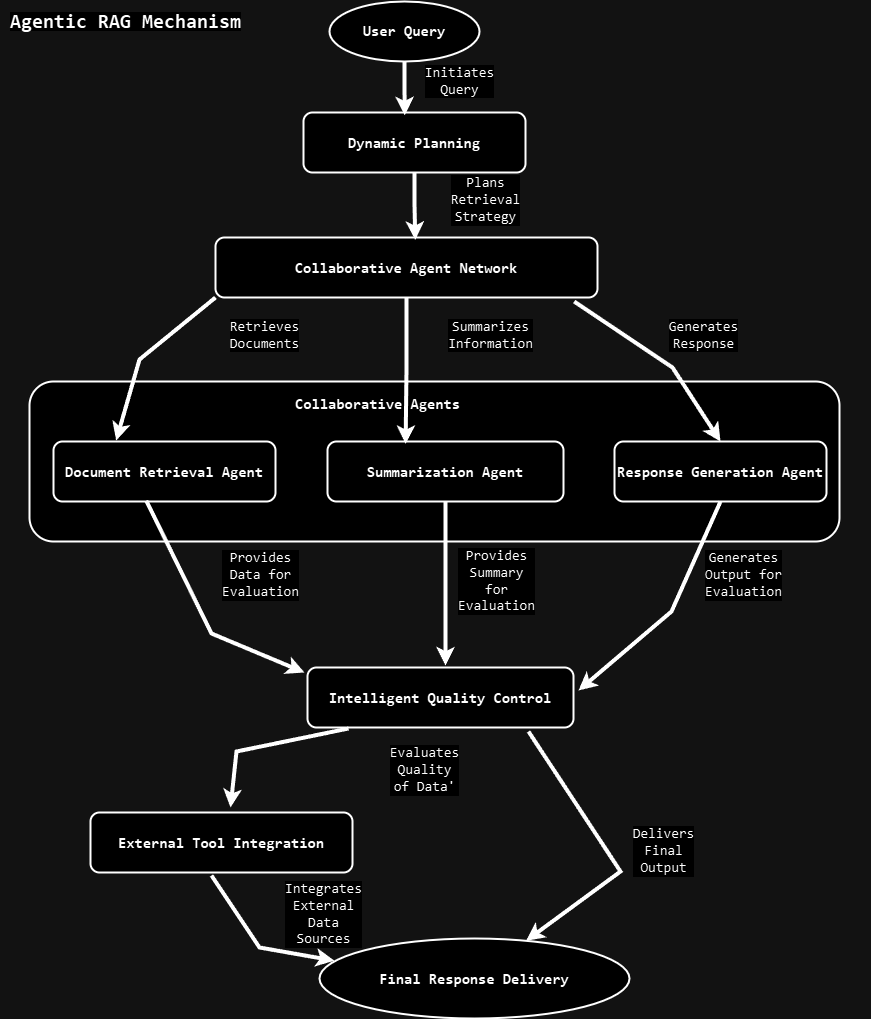

In [ ]:
!pip install pypdf2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 0: Set up the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 1: Download and Read the PDF
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Preprocess Text into Chunks
chunk_size = 1000
chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
print(f"Number of chunks created: {len(chunks)}")

Number of chunks created: 65


In [ ]:
# Step 3: User Query Initiation
user_query = "Fine tuning Bert?"

In [ ]:
# Step 4: Dynamic Planning - Analyze the Query Context
def analyze_query(query):
    try:
        analysis_response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a query analysis assistant."},
                {"role": "user", "content": f"Analyze the context of this query and develop a strategy for information retrieval:\n\n{query}"},
            ],
            model="llama3-8b-8192",
        )
        return analysis_response.choices[0].message.content
    except Exception as e:
        print(f"Error during query analysis: {e}")
        return None

In [ ]:
query_analysis = analyze_query(user_query)

In [ ]:
# Step 5: Document Retrieval Agent - Gather Relevant Documents
def retrieve_documents(query):
    vectorizer = TfidfVectorizer()
    query_embedding = vectorizer.fit_transform([query])
    chunk_embeddings = vectorizer.transform(chunks)

    similarities = cosine_similarity(query_embedding, chunk_embeddings).flatten()
    top_k_indices = similarities.argsort()[-3:][::-1]  # Get top 3 relevant chunks
    return [chunks[i] for i in top_k_indices]

In [ ]:
retrieved_documents = retrieve_documents(user_query)

In [ ]:
# Step 6: Summarization Agent - Condense Information from Retrieved Documents
def summarize_documents(documents):
    summaries = []
    for doc in documents:
        try:
            summary_response = client.chat.completions.create(
                messages=[
                    {"role": "system", "content": "You are a summarization assistant."},
                    {"role": "user", "content": f"Summarize the following document:\n\n{doc}"},
                ],
                model="llama3-8b-8192",
            )
            summaries.append(summary_response.choices[0].message.content)
        except Exception as e:
            print(f"Error during document summarization: {e}")
    return summaries

In [ ]:
summaries = summarize_documents(retrieved_documents)

In [ ]:
# Step 7: Response Generation Agent - Craft a Coherent Response
def generate_response(summaries):
    context = "\n\n".join(summaries)
    try:
        response_generation = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a response generation assistant."},
                {"role": "user", "content": f"Based on the following summarized information:\n\n{context}\n\nCraft a coherent response to the query: {user_query}"},
            ],
            model="llama3-8b-8192",
        )
        return response_generation.choices[0].message.content
    except Exception as e:
        print(f"Error during response generation: {e}")
        return None

In [ ]:
final_response = generate_response(summaries)

In [ ]:
# Step 8: Final Response Delivery
if final_response:
    print("\n--- Final Response ---\n")
    print(final_response)
else:
    print("No valid response generated.")


--- Final Response ---

Fine-tuning BERT! It's a crucial step in leveraging the pre-trained language model's capabilities for various natural language processing (NLP) tasks. By fine-tuning BERT, we can adapt its vast knowledge to specific tasks, such as sentiment analysis, linguistic acceptability, semantic textual similarity, and paraphrase detection, as demonstrated by the four tasks presented in the document.

The ablation study highlights the importance of using a suitable masking strategy during pre-training to optimize the performance of BERT on these tasks. The results show that using the [MASK] symbol during pre-training, with an 80% masking rate, yields the best MNLI accuracy, followed by fine-tuning. This suggests that using the [MASK] symbol during pre-training helps BERT learn more effective representations, which can be further fine-tuned for specific tasks.

What's more, the document emphasizes the significance of working with a document-level corpus when fine-tuning BE

### 1. Set up the Groq Client
First, the Groq API client is initialized with an API key. This client is essential for the various tasks of query analysis, document summarization, and response generation in the process.

### 2. Download and Read the PDF
The process begins by downloading a PDF (for example, the BERT paper from arXiv) using a URL. The file is then saved locally and read using the PyPDF2 library, extracting all the text from the document for further processing.

### 3. Preprocess Text into Chunks
Once the PDF is read and the text extracted, the next step involves dividing the long text into smaller, manageable chunks. This helps make the processing more efficient and allows for better handling when performing tasks like searching or summarizing. Each chunk typically contains a fixed number of characters (like 1000 characters per chunk).

### 4. User Query Initiation
The user provides a query, such as "Fine tuning Bert?". This is the starting point for the entire process, as the goal is to retrieve relevant information from the document that addresses this specific query.

### 5. Dynamic Planning - Analyze the Query Context
The Groq client is used to analyze the context of the user query. This step involves understanding the intent and details of the query so that a strategy can be developed for retrieving the most relevant sections from the document. This dynamic analysis helps set the direction for what information to prioritize.

### 6. Document Retrieval Agent - Gather Relevant Documents
Using the user’s query, the system retrieves relevant parts of the document. This is done by converting both the query and document chunks into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. The cosine similarity metric is then used to calculate which document chunks are most relevant to the query. The top most relevant chunks are retrieved for further processing.

### 7. Summarization Agent - Condense Information from Retrieved Documents
Once relevant documents are identified, the next step is to summarize them. This is done to condense the information and present only the most important parts of the retrieved text, making it easier to understand. Summarization is performed using the Groq API, which processes each document chunk and generates concise summaries.

### 8. Response Generation Agent - Craft a Coherent Response
With the summaries of the relevant documents in hand, the system now crafts a coherent response to the user’s query. The summarized content is used as context to generate a response that directly addresses the user's question. This step ensures that the final answer is not just relevant but also coherent and well-structured.

### 9. Final Response Delivery
Finally, the generated response is presented to the user. If no valid response can be produced, an error message is shown. This marks the end of the process, where the goal is to provide the user with the most relevant and concise answer based on the input query and the document content.



## Applications of Agentic RAG



- **Customer Support**: Provides accurate real-time responses to customer inquiries, enhancing overall productivity and efficiency.

- **Research Assistance**: Helps researchers synthesize relevant data and present insightful analyses quickly.

- **Knowledge Management**: Streamlines access to crucial internal information for informed decision-making.

- **Content Creation**: Assists in generating high-quality content by synthesizing information from multiple sources.



## Advantages of Agentic RAG



- **Improved Accuracy**: By interpreting user intent effectively, Agentic RAG delivers more precise and relevant responses.

- **Enhanced Efficiency**: The ability to run multiple agents concurrently allows for faster processing times, particularly for complex queries.

- **Scalability**: Its modular design enables easy integration of new data sources and functionalities, making it adaptable to changing needs.

- **Real-Time Adaptation**: The system can adjust its strategies based on real-time feedback, ensuring that it remains effective in dynamic environments.



## Limitations of Agentic RAG



- **Complexity in Implementation**: The integration of multiple agents and external tools can lead to increased system complexity, requiring careful management.

- **Resource Intensive**: Requires significant computational resources for managing multiple concurrent agents and processing large datasets, which may increase operational costs.

- **Data Quality Dependency**: The effectiveness of the system relies heavily on the quality and relevance of the data sources used; poor-quality data can lead to inaccurate outputs.



## Conclusion



Agentic RAG represents a transformative advancement in AI-driven information retrieval systems. By combining adaptive agents with dynamic planning capabilities, it enhances the accuracy and efficiency of responses while facilitating seamless integration with various data sources. As organizations increasingly seek sophisticated solutions for managing vast amounts of data, Agentic RAG stands out as a powerful tool for achieving robust information retrieval outcomes.



Having explored Agentic RAG, we will now move on to Self-RAG.